# Libraries

In [150]:
import numpy as np
import pandas as pd
import scipy.stats as st
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import ElasticNet
from sklearn.pipeline import Pipeline


from sklearn.metrics import mean_squared_error, r2_score 
from sklearn.inspection import permutation_importance

from feature_engine.encoding import OrdinalEncoder
from feature_engine.transformation import BoxCoxTransformer

plt.style.use("dark_background")

# Load Dataset

In [25]:
df = pd.read_csv("Automobile.csv")
df.head()

,name,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
0,chevrolet chevelle malibu,18.0,8,307.0,130.0,3504,12.0,70,usa
1,buick skylark 320,15.0,8,350.0,165.0,3693,11.5,70,usa
2,plymouth satellite,18.0,8,318.0,150.0,3436,11.0,70,usa
3,amc rebel sst,16.0,8,304.0,150.0,3433,12.0,70,usa
4,ford torino,17.0,8,302.0,140.0,3449,10.5,70,usa


# Exploration

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          398 non-null    object 
 1   mpg           398 non-null    float64
 2   cylinders     398 non-null    int64  
 3   displacement  398 non-null    float64
 4   horsepower    392 non-null    float64
 5   weight        398 non-null    int64  
 6   acceleration  398 non-null    float64
 7   model_year    398 non-null    int64  
 8   origin        398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


In [27]:
df.isnull().sum()

name            0
mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model_year      0
origin          0
dtype: int64

In [28]:
df[df.isnull().any(axis = 1)]

,name,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
32,ford pinto,25.0,4,98.0,NaN,2046,19.0,71,usa
126,ford maverick,21.0,6,200.0,NaN,2875,17.0,74,usa
330,renault lecar deluxe,40.9,4,85.0,NaN,1835,17.3,80,europe
336,ford mustang cobra,23.6,4,140.0,NaN,2905,14.3,80,usa
354,renault 18i,34.5,4,100.0,NaN,2320,15.8,81,europe
374,amc concord dl,23.0,4,151.0,NaN,3035,20.5,82,usa


In [12]:
df["name"].nunique()

305

In [30]:
df[df["name"]== "ford pinto"]

,name,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
32,ford pinto,25.0,4,98.0,NaN,2046,19.0,71,usa
112,ford pinto,19.0,4,122.0,85.0,2310,18.5,73,usa
130,ford pinto,26.0,4,122.0,80.0,2451,16.5,74,usa
168,ford pinto,23.0,4,140.0,83.0,2639,17.0,75,usa
174,ford pinto,18.0,6,171.0,97.0,2984,14.5,75,usa
206,ford pinto,26.5,4,140.0,72.0,2565,13.6,76,usa


In [31]:
df[df["name"]== "ford maverick"]

,name,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
17,ford maverick,21.0,6,200.0,85.0,2587,16.0,70,usa
100,ford maverick,18.0,6,250.0,88.0,3021,16.5,73,usa
126,ford maverick,21.0,6,200.0,NaN,2875,17.0,74,usa
155,ford maverick,15.0,6,250.0,72.0,3158,19.5,75,usa
193,ford maverick,24.0,6,200.0,81.0,3012,17.6,76,usa


In [22]:
df[df["name"]== "renault lecar deluxe"]

,name,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
330,renault lecar deluxe,40.9,4,85.0,53.5,1835,17.3,80,europe


In [23]:
df[df["name"]== "ford mustang cobra"]

,name,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
336,ford mustang cobra,23.6,4,140.0,NaN,2905,14.3,80,usa


In [29]:
df[df["name"] == "renault 18i"]

,name,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
354,renault 18i,34.5,4,100.0,NaN,2320,15.8,81,europe


In [32]:
df[df["name"] == "amc concord dl"]

,name,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
374,amc concord dl,23.0,4,151.0,NaN,3035,20.5,82,usa


In [33]:
missing_cars = {
    "ford pinto": [32, 75], 
    "ford maverick": [126, 75], 
    "renault lecar deluxe": [330, 53.5], 
    "ford mustang cobra": [336, 135],
    "renault 18i": [354, 81],
    "amc concord dl": [374, 82]
    }

for car, values in missing_cars.items():
    index = values[0]
    car_horsepower = values[1]
    
    df.at[index, "horsepower"] = car_horsepower
    print(f"The {car} was filled with: {car_horsepower}.")

The ford pinto was filled with: 75.
The ford maverick was filled with: 75.
The renault lecar deluxe was filled with: 53.5.
The ford mustang cobra was filled with: 135.
The renault 18i was filled with: 81.
The amc concord dl was filled with: 82.


In [35]:
def percent_missing(df):
    percent_nan = 100 * df.isnull().sum() / len(df)
    percent_nan = percent_nan[percent_nan > 0].sort_values()
    
    return percent_nan

In [36]:
percent_missing(df)

Series([], dtype: float64)

In [48]:
df.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.154523,2970.424623,15.568090,76.010050
std,7.815984,1.701004,104.269838,38.405786,846.841774,2.757689,3.697627
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000
25%,17.500000,4.000000,104.250000,75.000000,2223.750000,13.825000,73.000000
50%,23.000000,4.000000,148.500000,92.000000,2803.500000,15.500000,76.000000
75%,29.000000,8.000000,262.000000,125.000000,3608.000000,17.175000,79.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000


In [40]:
df["cylinders"].value_counts()

cylinders
4    204
8    103
6     84
3      4
5      3
Name: count, dtype: int64

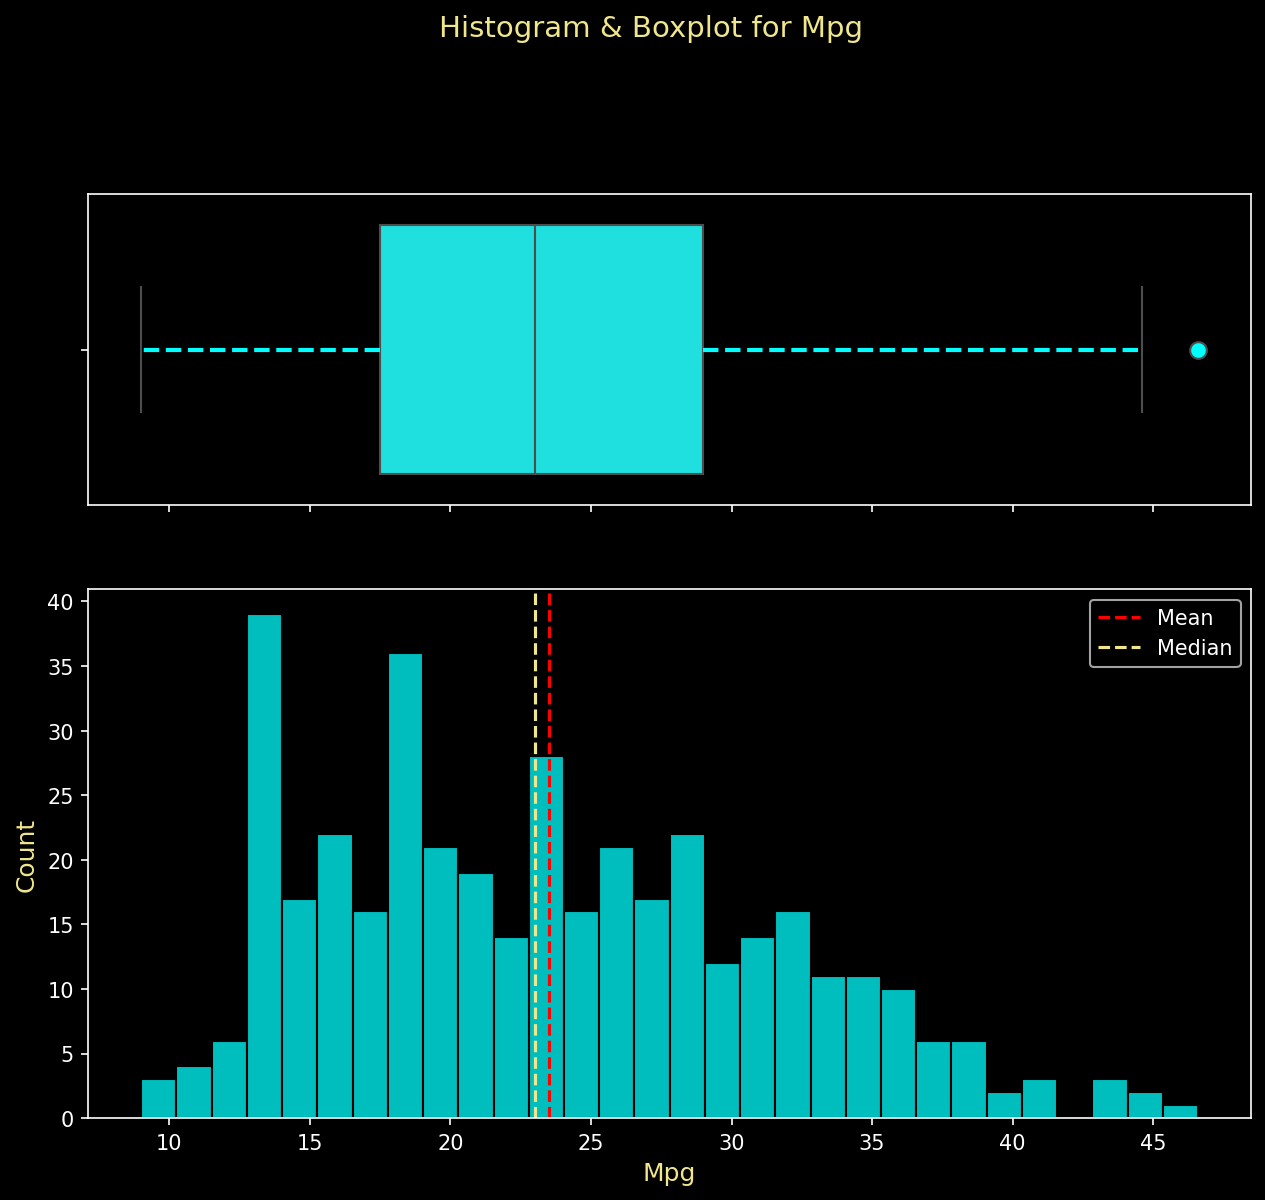

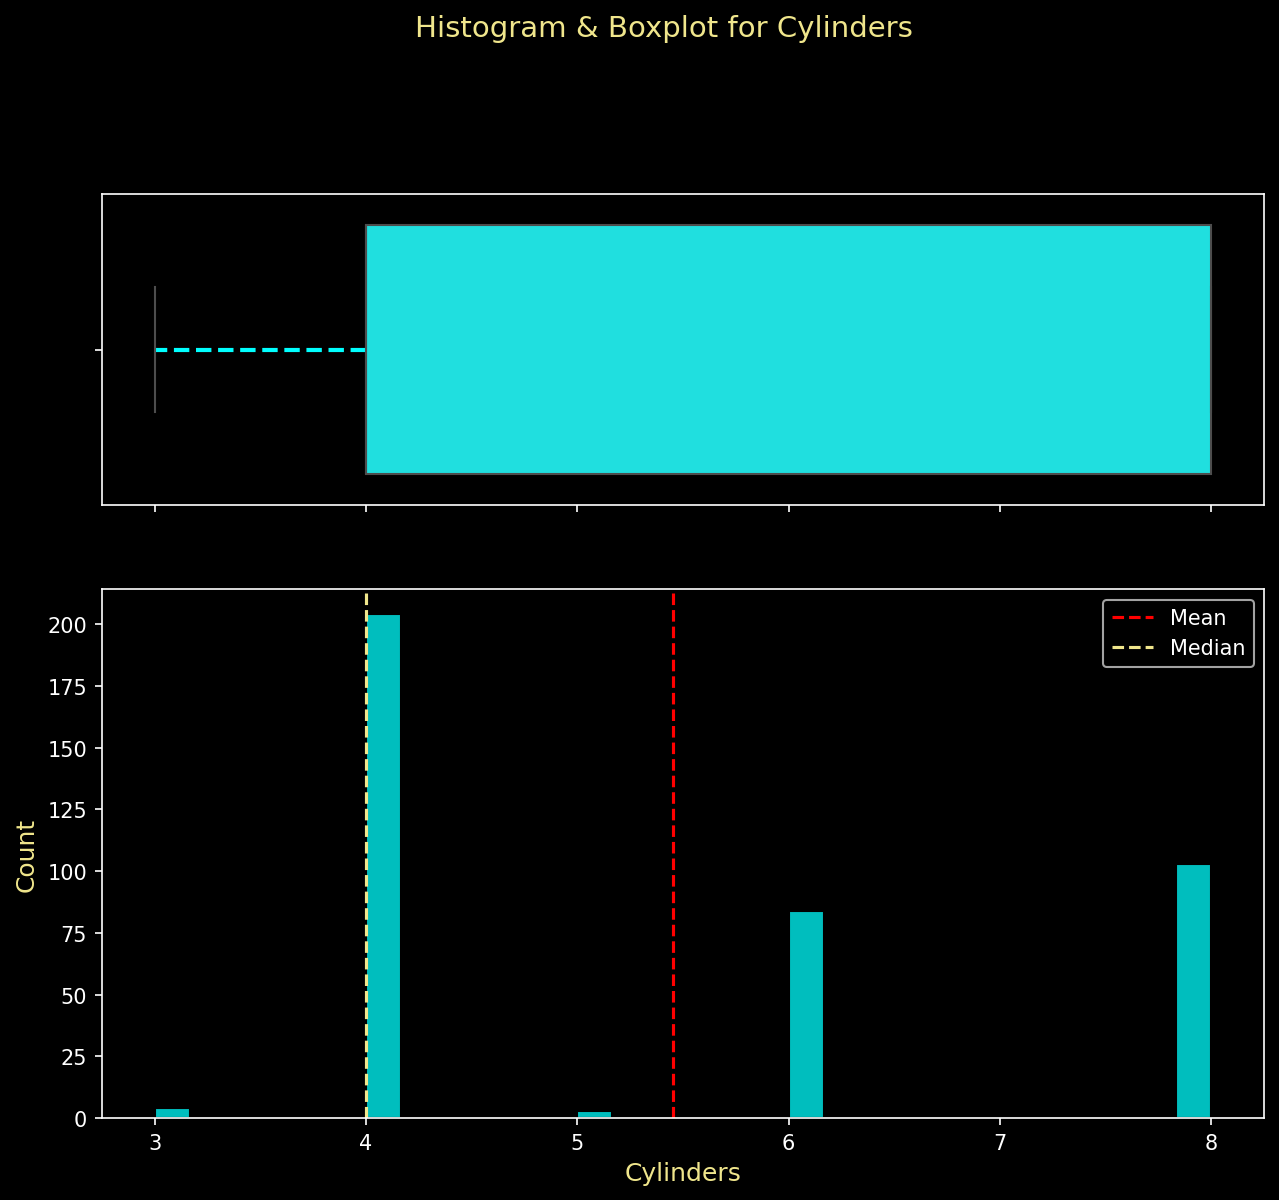

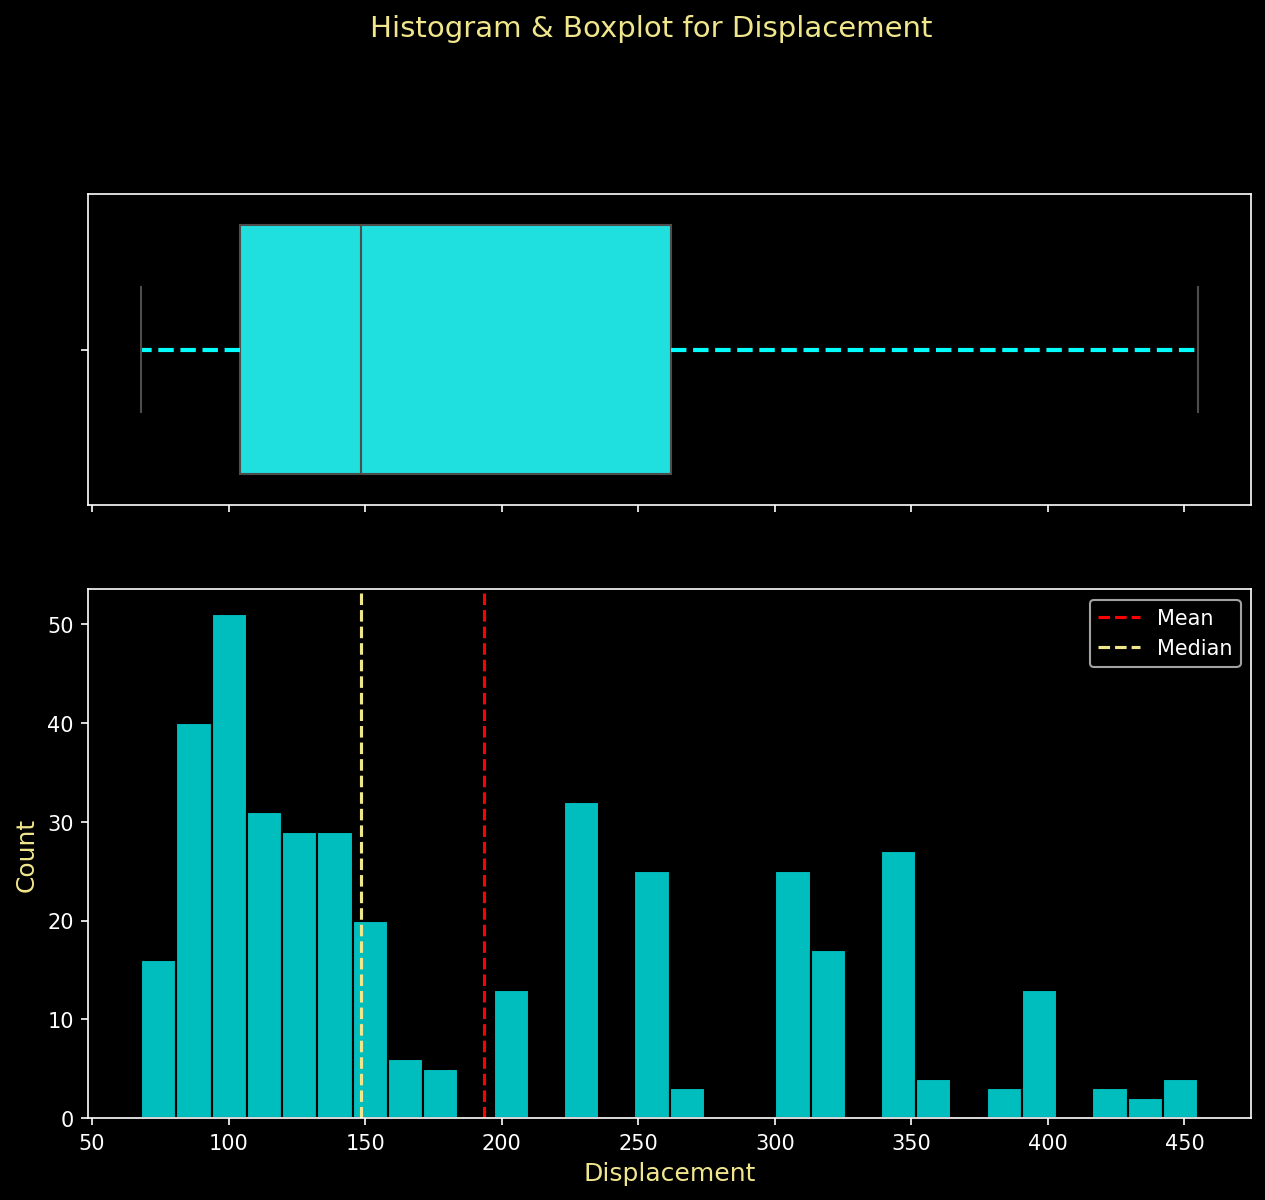

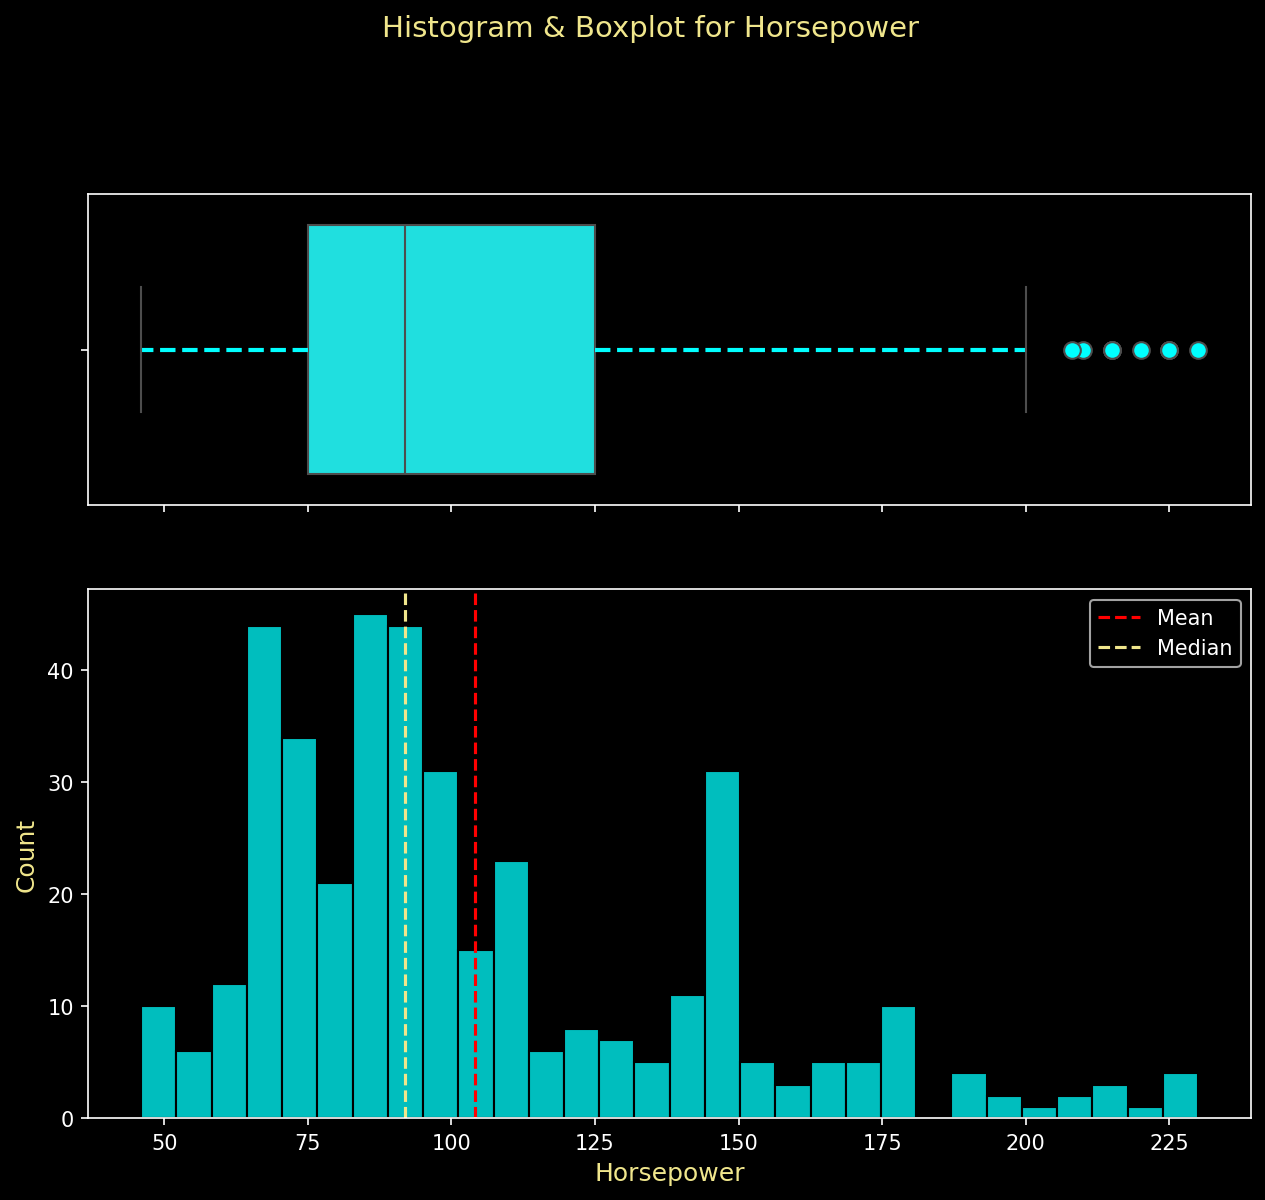

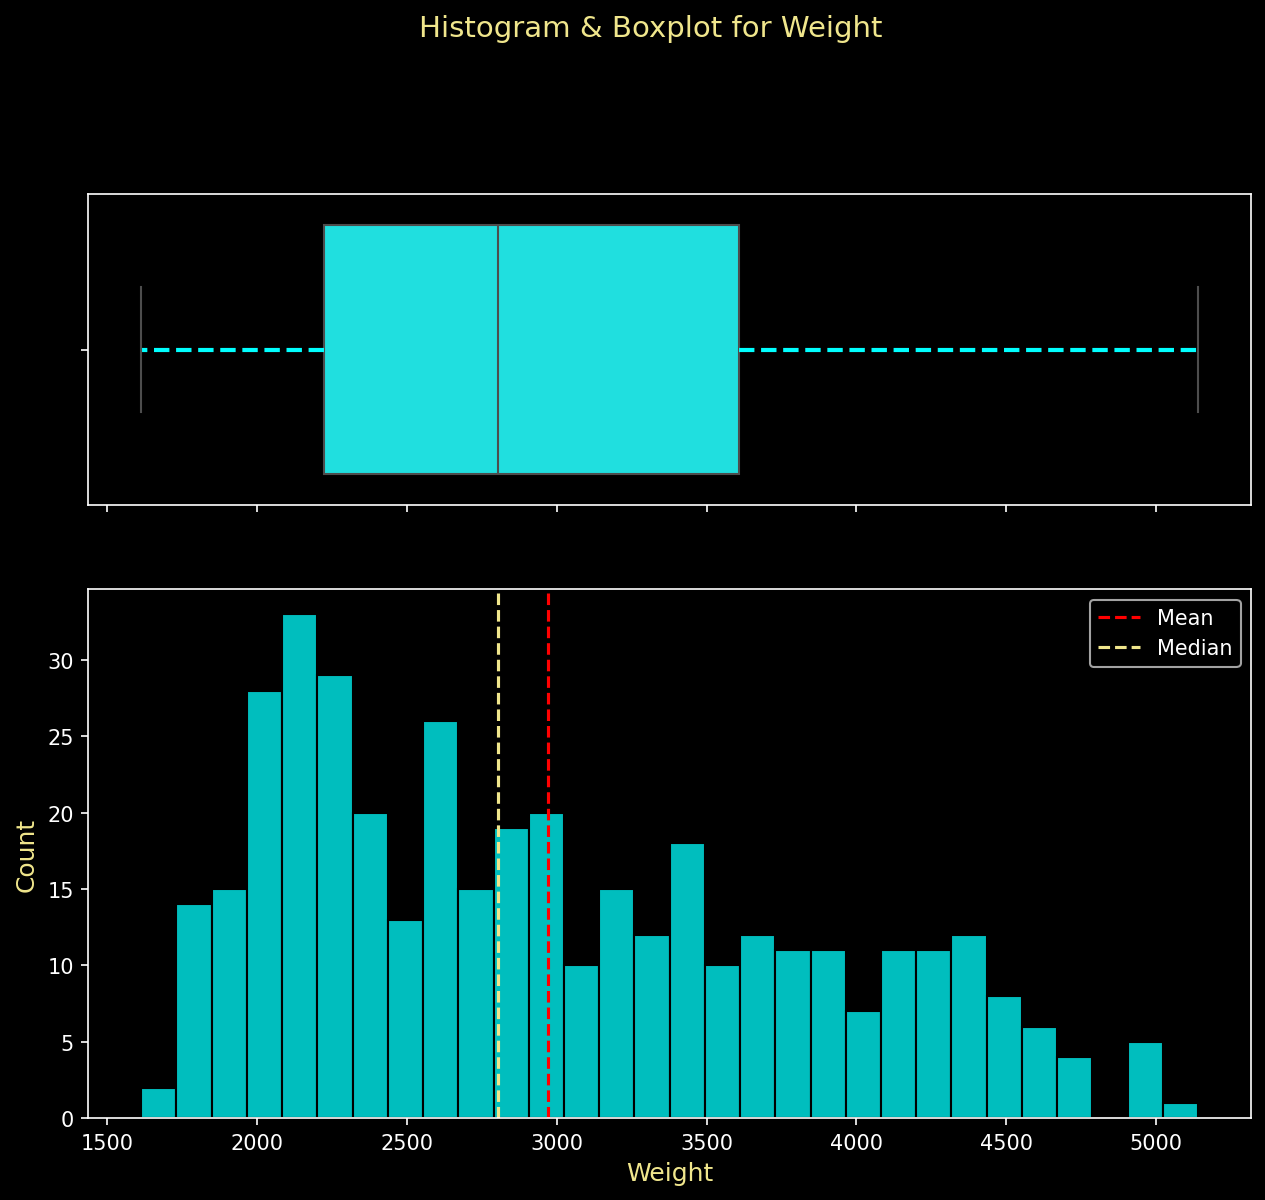

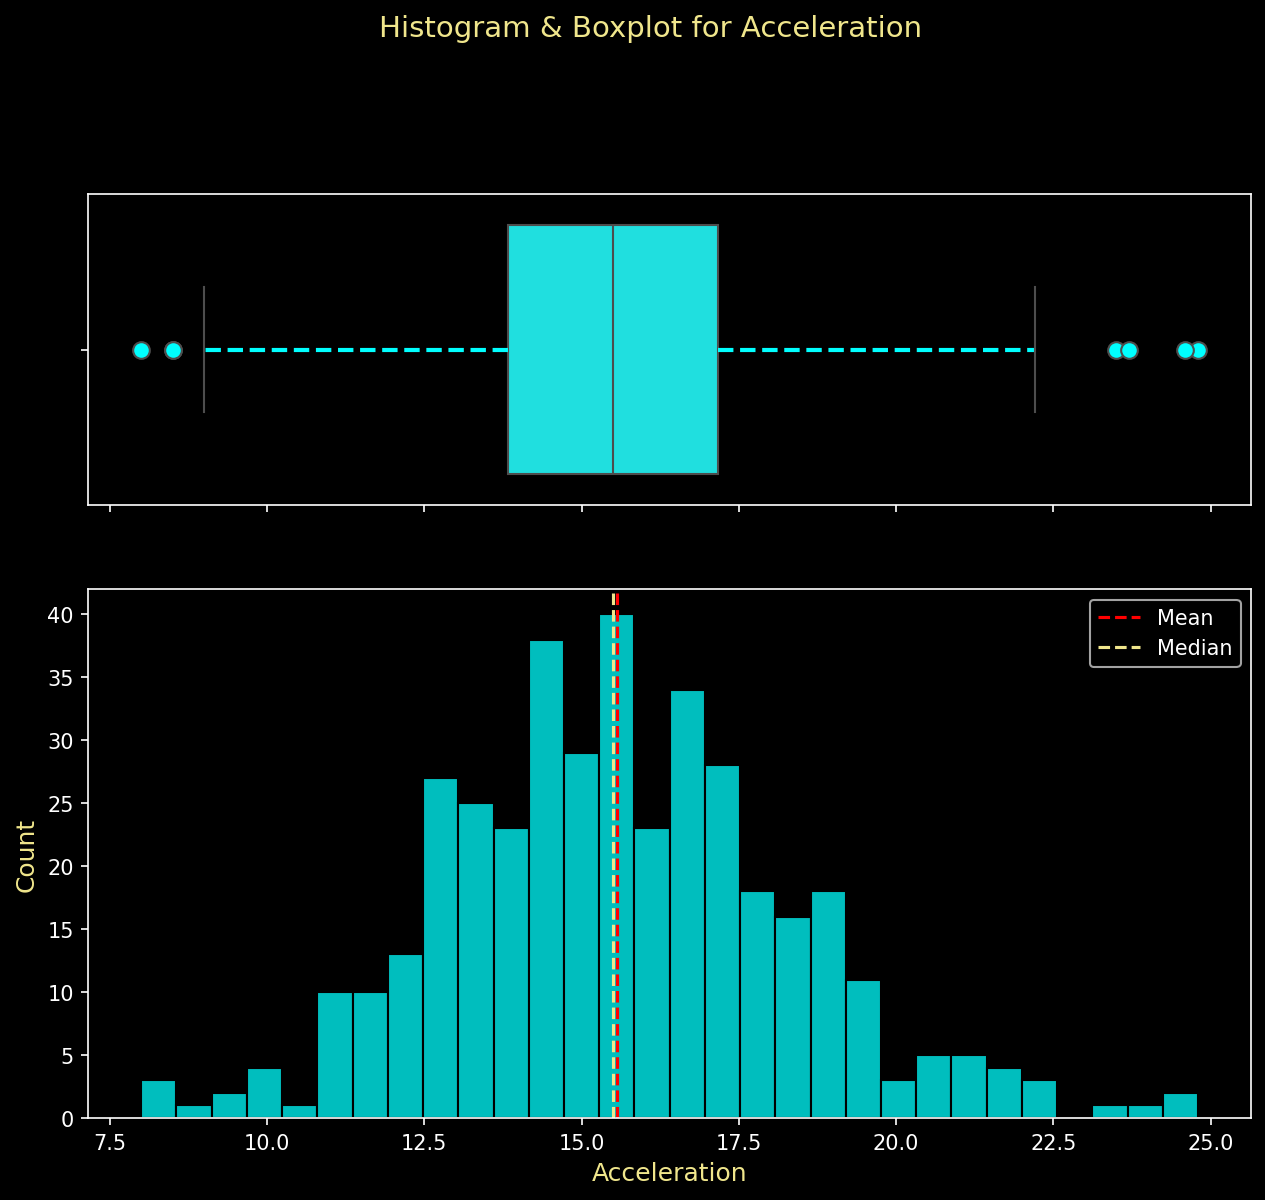

In [92]:
for var in df.drop(["name", "model_year", "origin"], axis = 1).columns:
    
    f, (ax_box, ax_hist) = plt.subplots(
        2, 
        sharex= True, 
        gridspec_kw={"height_ratios": (0.50, 0.85)},
        figsize = (10, 8),
        dpi = 150 
    )
    
    box_plot = sns.boxplot(
        x = df[var],
        color = "aqua",
        ax = ax_box,
        whiskerprops = {
            "color" : "aqua",
            "linewidth": 2,
            "linestyle" : "--"
        },
        flierprops = {
            "markerfacecolor" : "aqua",
            "markersize": 8
        }
        )
    
    histogram = sns.histplot(
        data = df,
        x = var,
        bins = 30,
        color = "aqua",
        edgecolor = "black",
        ax = ax_hist
    )
    box_plot.set(xlabel = "")
    
    histogram.figure.suptitle(
        f"Histogram & Boxplot for {var.capitalize()}",
        fontsize = 14,
        color = "khaki",
        y = 1.03
        )
    
    plt.axvline(
        x = df[var].mean(),
        linestyle = "--",
        color = "red",
        label = "Mean"
    )
    
    plt.axvline(
        x = df[var].median(),
        linestyle = "--",
        color = "khaki",
        label = "Median"
    )
    
    ax_hist.set_xlabel(f"{var.capitalize()}", color = "khaki", fontsize = 12)
    ax_hist.set_ylabel(f"Count", color = "khaki", fontsize = 12)
    
    plt.legend();

<blockquote>
Acceleration appears normally distributed with a few outliers.
<br>Weight, Horsepower, and Displacement are skewed to the right. </blockquote>

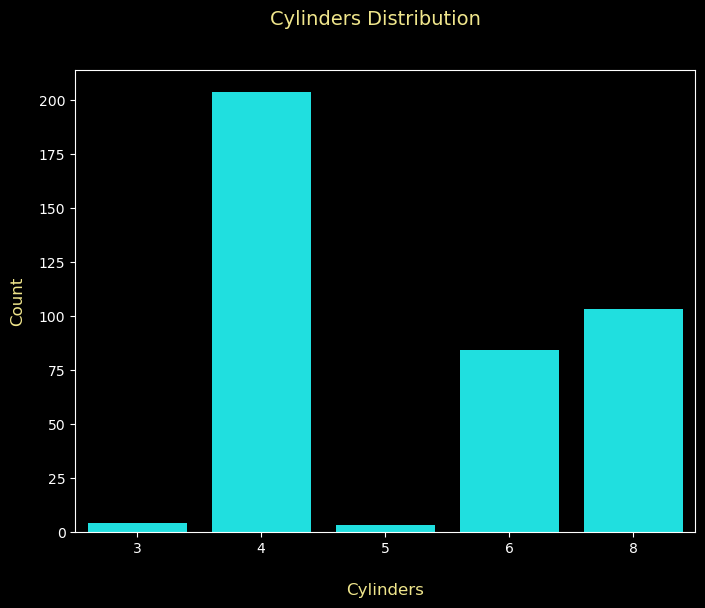

In [62]:
plt.figure(figsize= (8, 6))
plot = sns.countplot(
    data = df,
    x = "cylinders",
    color = "aqua"
)
plot.set_xlabel(
    xlabel= "Cylinders",
    labelpad= 20,
    color = "khaki",
    fontsize = 12)

plot.set_ylabel(
    ylabel = "Count",
    labelpad = 10,
    color = "khaki",
    fontsize = 12
)

plot.figure.suptitle("Cylinders Distribution", color= "khaki", fontsize = 14);

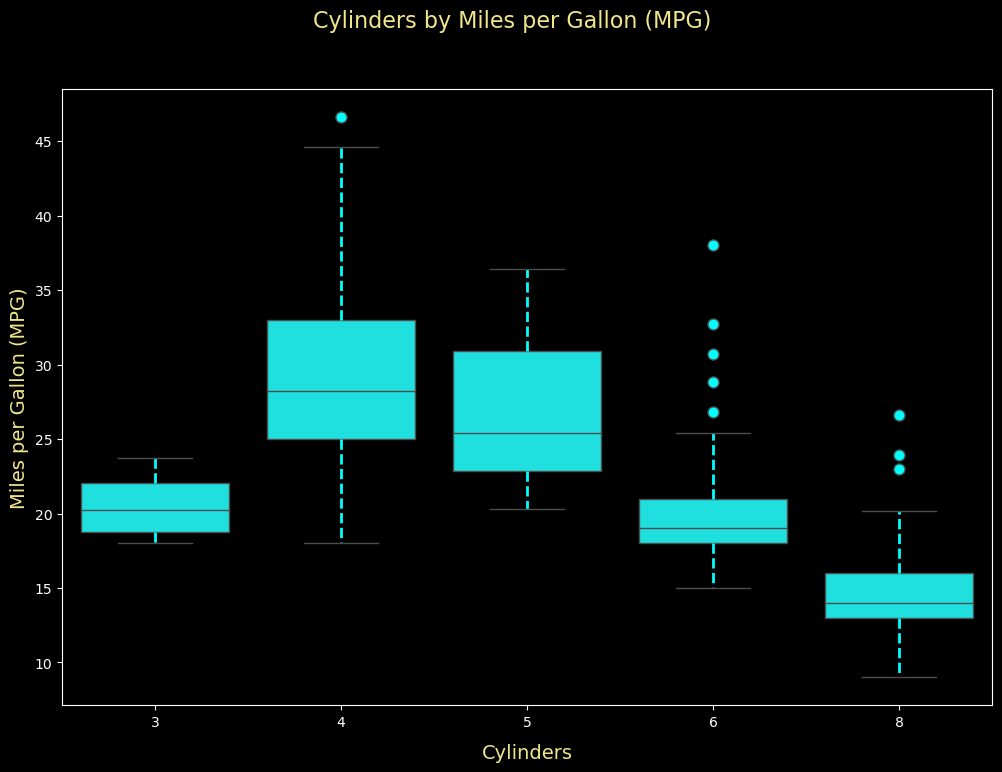

In [118]:
plt.figure(figsize = (12, 8), dpi = 100)
boxplot = sns.boxplot(
    data = df,
    x = "cylinders",
    y = "mpg",
    color = "aqua",
    whiskerprops = {
        "color" : "aqua",
        "linewidth" : 2,
        "linestyle": "--"
    },
    flierprops = {
        "markerfacecolor": "aqua",
        "markersize" : 8,
    }
)
boxplot.set_xlabel(
    xlabel = "Cylinders", 
    color = "khaki",
    fontsize = 14,
    labelpad = 10
    )

boxplot.set_ylabel(
    ylabel = "Miles per Gallon (MPG)",
    color = "khaki",
    fontsize = 14
)

boxplot.figure.suptitle("Cylinders by Miles per Gallon (MPG)", fontsize = 16, color = "khaki");

<blockquote>There are outliers present in cars with 3, 4 and 8 cylinders.</blockquote>

In [102]:
df["origin"].value_counts()

origin
usa       249
japan      79
europe     70
Name: count, dtype: int64

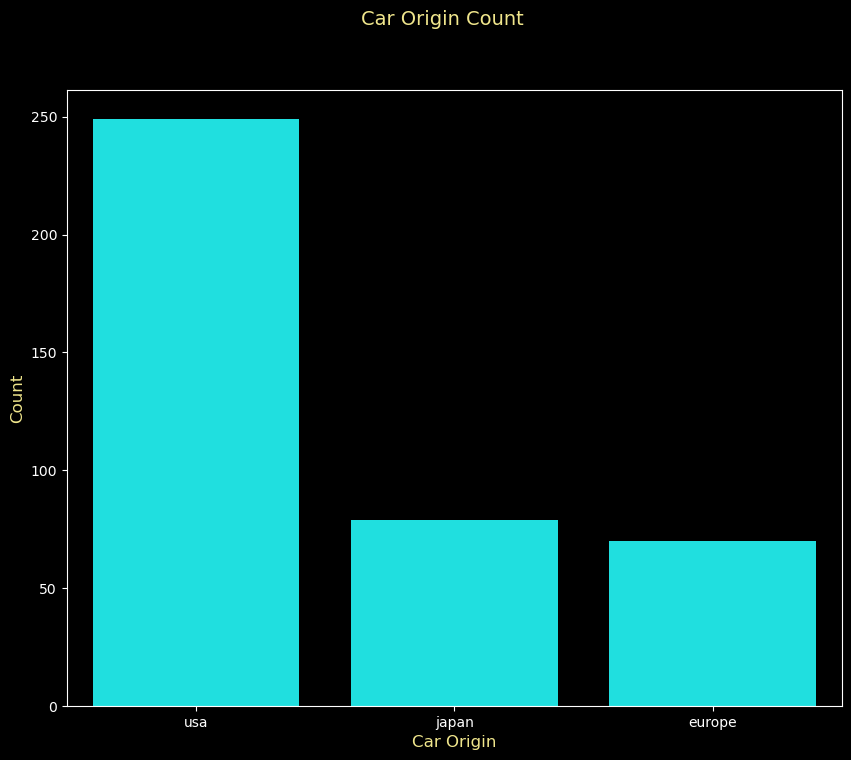

In [124]:
plt.figure(figsize = (10, 8))
countplot = sns.countplot(
    data = df,
    x = "origin",
    color = "aqua",
)

countplot.set_xlabel("Car Origin", fontsize = 12, color= "khaki")
countplot.set_ylabel("Count", fontsize = 12, color = "khaki")
countplot.figure.suptitle(t ="Car Origin Count", fontsize = 14, color = "khaki");

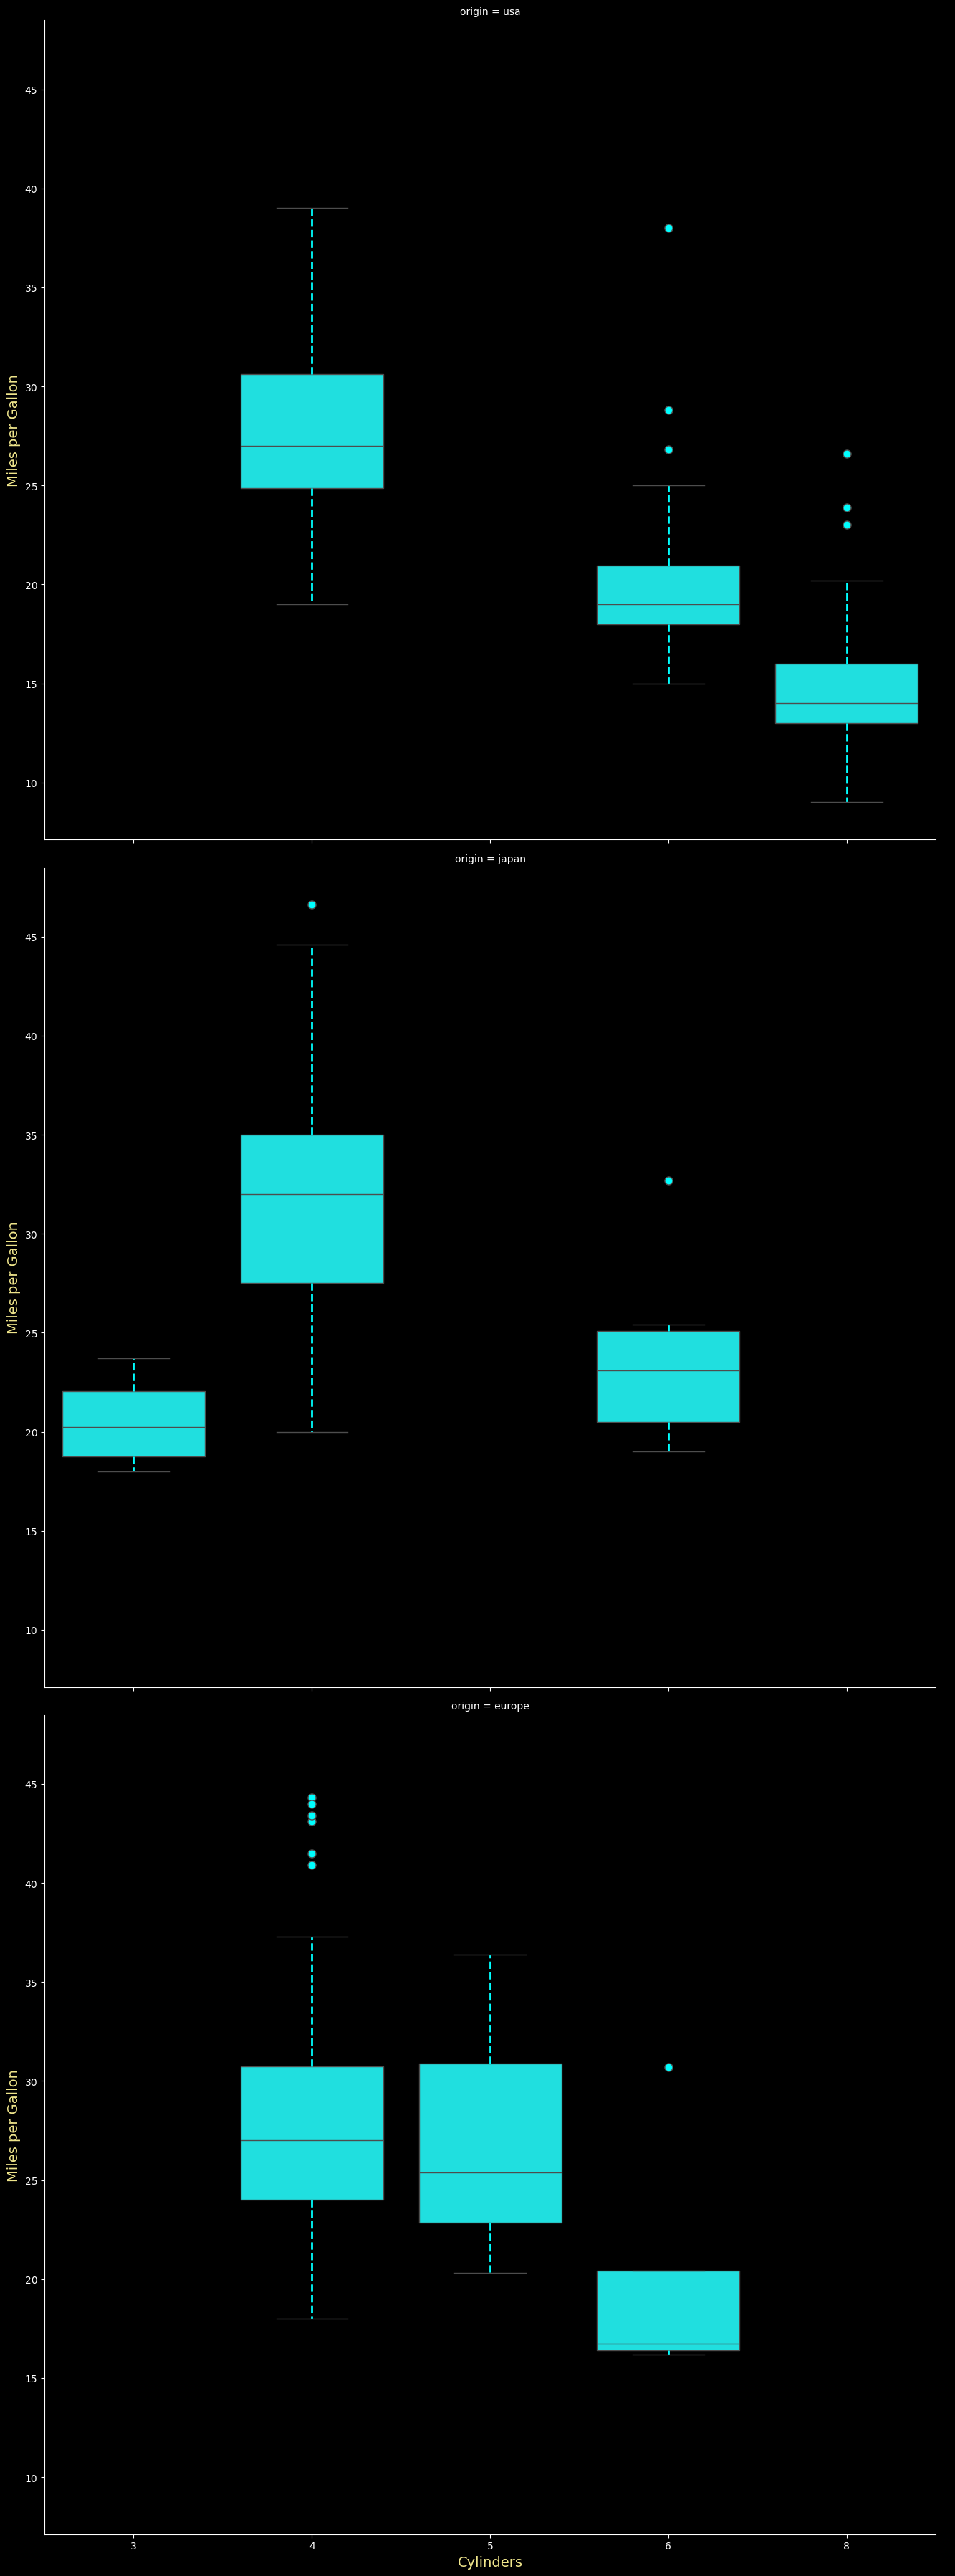

In [129]:

catplot = sns.catplot(
    data = df,
    x = "cylinders",
    y = "mpg",
    kind = "box",
    row = "origin",
    color = "aqua",
    whiskerprops = {
        "color": "aqua",
        "linestyle" : "--",
        "linewidth": 2 
    },
    flierprops = {
        "markerfacecolor" : "aqua",
        "markersize": 8
    },
    height= 12,
    aspect = 1.1
)
catplot.set_xlabels("Cylinders", fontsize = 14, color = "khaki")
catplot.set_ylabels("Miles per Gallon", fontsize = 14, color = "khaki");

<blockquote>Cars of European origin have outliers with 4 and 6 cylinders. <br>
Cars of American origin have outliers with 6 and 8 cylinders.</blockquote>

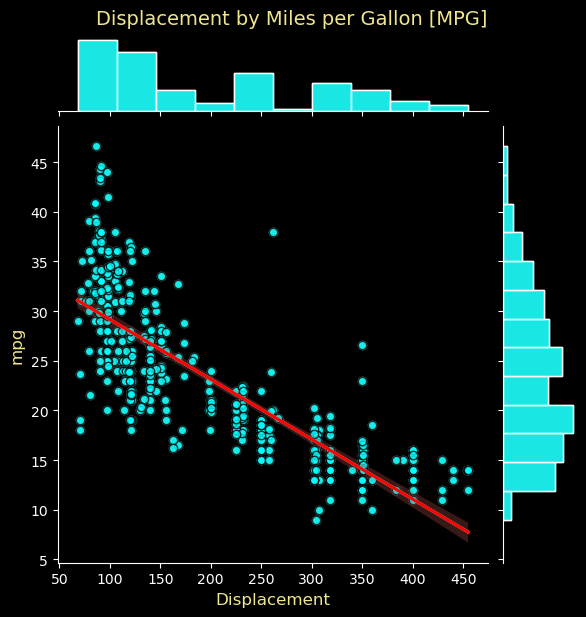

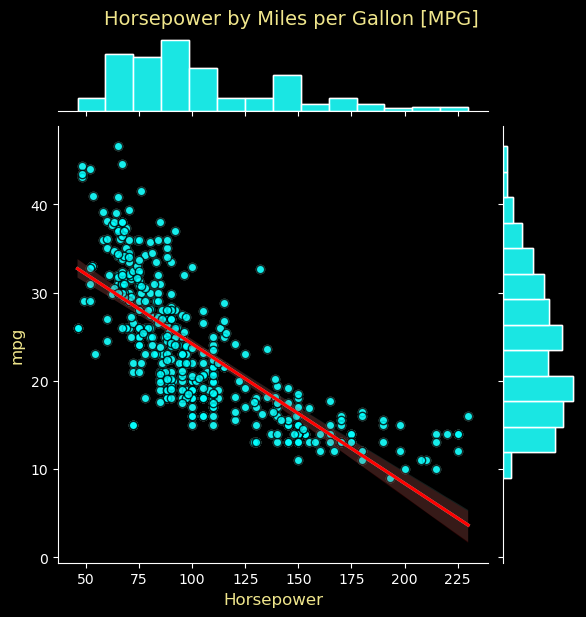

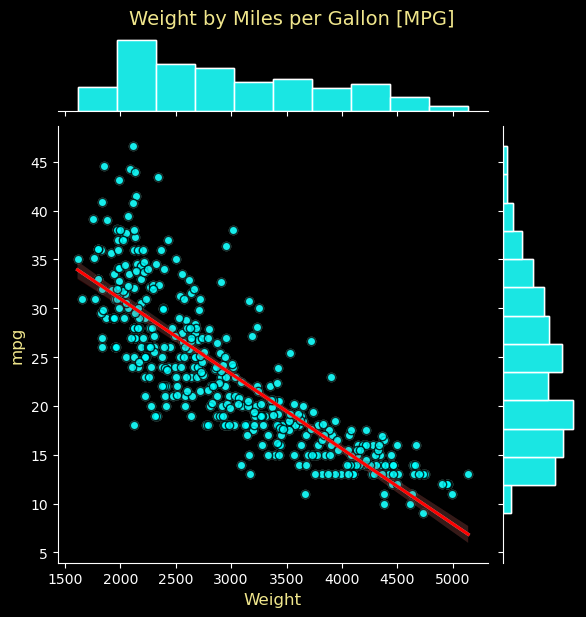

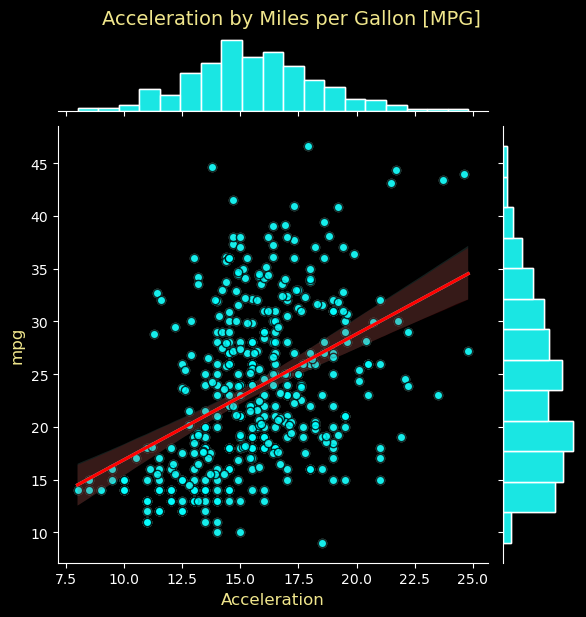

In [144]:
for var in df.drop(["name","origin","model_year", "mpg", "cylinders"], axis = 1).columns:    
    g = scatter = sns.JointGrid(
        data = df,
        x = var,
        y = "mpg"
    )
    g = g.plot(sns.regplot, sns.histplot)
    g.plot_marginals(sns.histplot, color = "aqua")
    
    sns.regplot(
        data = df,
        x = var,
        y = "mpg",
        ax = g.ax_joint,
        scatter_kws={"color": "aqua", "edgecolor": "black"},
        line_kws = {"color": "red"}
    )
    g.set_axis_labels(
        f"{var.capitalize()}",
        "mpg",
        color = "khaki",
        fontsize = 12
    )
    
    g.figure.suptitle(
        f"{var.capitalize()} by Miles per Gallon [MPG]",
        y = 1.02,
        fontsize = 14,
        color = "khaki"
    )

<blockquote>The car acceleration does not have high correlation with Miles per Gallon.</blockquote>

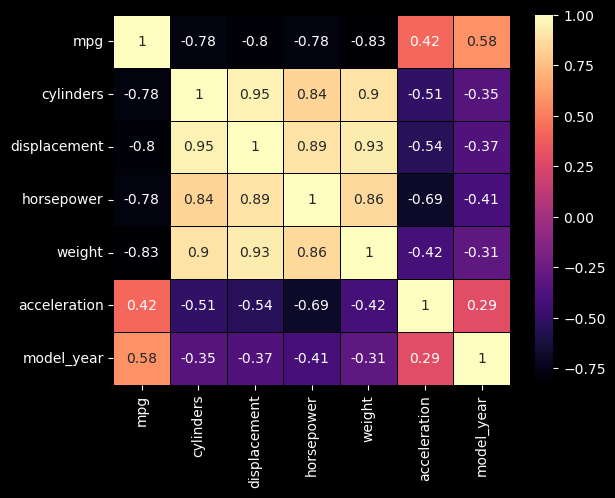

In [146]:
corr = df.corr(numeric_only= True)
sns.heatmap(corr, 
            annot = True,
            linewidths = 0.7,
            cmap = "magma",
            linecolor = "black"
            );

<blockquote>The dataset has the presence of multicollinearity. <br />
Cylinders, Displacement, Horsepower and Weight are highly correlated among themselves. </blockquote>

# Feature Engineering

In [147]:
X = df.drop(["mpg", "name"], axis = 1)
y = df["mpg"]

In [ ]:
for var in 

In [148]:
X_train, X_test, y_train, y_test = train_test_split(
    x = X,
    y = y,
    test_size= 0.3,
    random_state= 42
)

NameError: name 'train_test_split' is not defined